# Loan default prediction

This comes from [this kaggle competition](https://www.kaggle.com/c/credit-default-prediction-ai-big-data/overview)

Our approach:
* Standard imports
* Read in data and look at summary statistics
* EDA (distributions, relationships)
* Model selection, model building (may try a few)
* Answer the 'so what'

## Initial look

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
# read in data
df = pd.read_csv("data/train.csv")
df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [3]:
# summary stats
print(f"Shape: {df.shape}")
print("\n")
print(df.info())

df.describe()

Shape: (7500, 18)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-nul

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


### Summary stats

* 17 features (with one target)
* 7500 observations
* A couple of columns with > 1000 missing values (will explore more later)
* A couple of columns with < 500 missing values (will explore more later)

In [4]:
# categorical variable values
for col in df.columns:
    if df[col].dtype == "object":
        print(col)
        print(df[col].value_counts())
        print("\n")
    elif col == "Credit Default":
        print(col)
        print(df[col].value_counts())
        print("\n")
    else:
        pass

Home Ownership
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64


Years in current job
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64


Purpose
debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64


Term
Short Term    5556
Long Term     1944
Name: Term, dtype: int64


Credit Default
0    5387
1    2113
Name: Credit Default

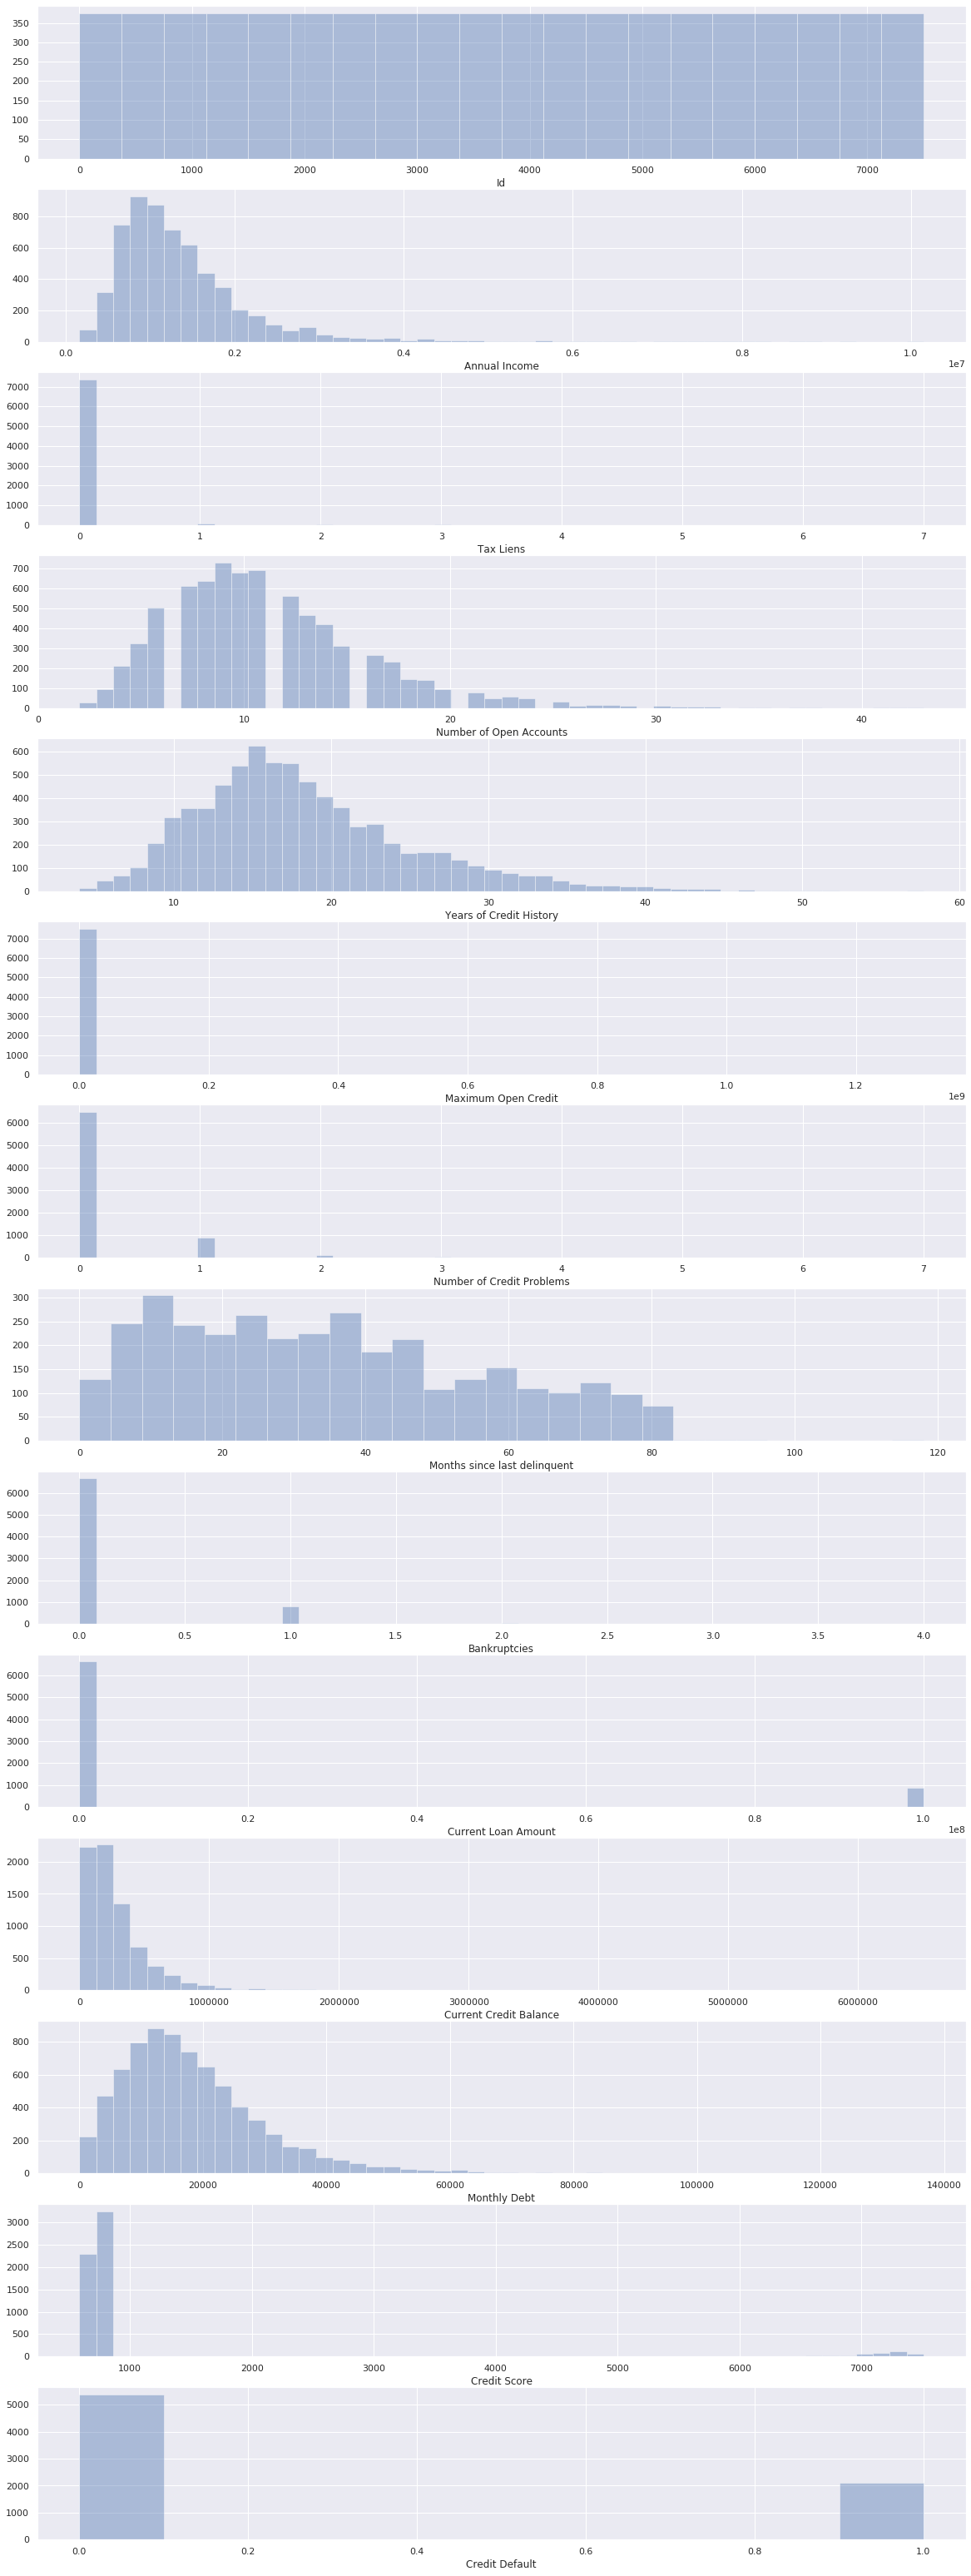

In [5]:
# distributions
def show_histograms(df):
    """
    Shows the distribution of data for each columns separately
    """
    numeric_cols = [col for col in df.columns if df[col].dtype != "object"]
    numeric_col_ct = len(numeric_cols)
    
    f, ax = plt.subplots(numeric_col_ct, 1, figsize=(20, numeric_col_ct*4))
    
    for i, col in enumerate(numeric_cols):
        sns.distplot(df[col], kde=False, ax=ax[i])
    
    plt.show()
    
    pass

# going to write it here first because need to test a bit

show_histograms(df)

### Obversations from distributions
* Most distributions are right-skewed
* For current loan balance, there seems to be a group of customers with 100,000,000 dollars of loan balance - this may be a value that's imputed in certain conditions. We should investigate this a bit before moving on
* Credit score values seem to be either very low or very high
* We may need to variable which could cause leakage with the target variable (e.g. credit score, number of credit problems, bankruptcies)

*Outliers / data issues: loan balances of $100m*

In [16]:
df.columns

Index(['Id', 'Home Ownership', 'Annual Income', 'Years in current job',
       'Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

# PICK UP FROM HERE

In [17]:
print(df["Current Loan Amount"].value_counts()) # gives 870 customers with 99999999 loan balance

# high_rollers = df where loan amount = 99999999 - 

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

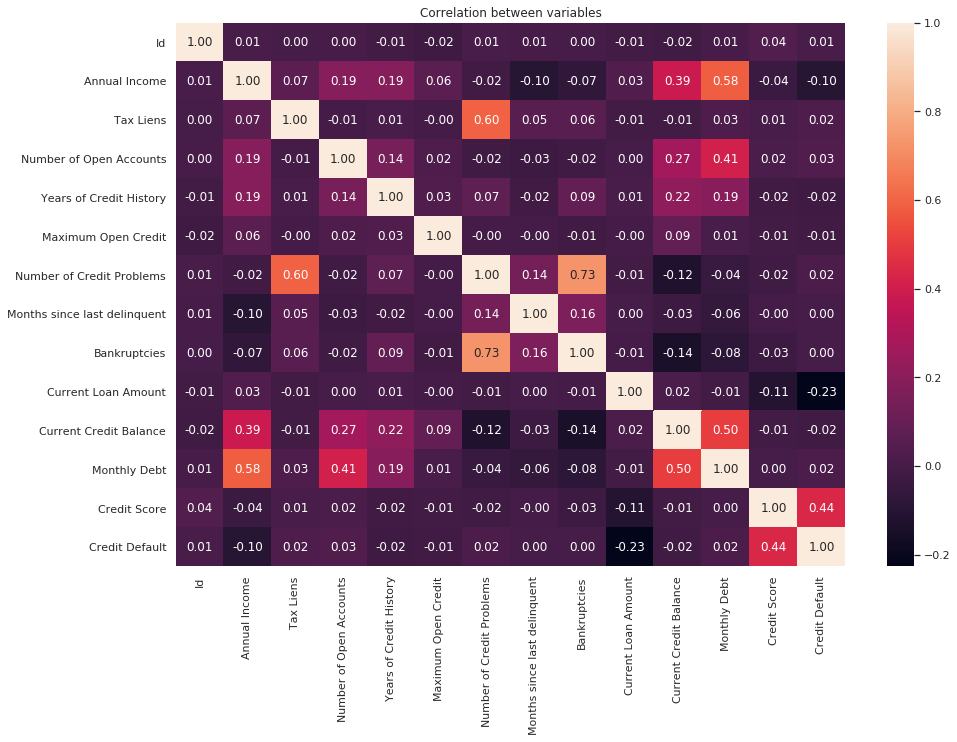

In [6]:
# correlations
f, ax = plt.subplots(1, 1, figsize=(15,10))

correlations = df.corr()
sns.heatmap(correlations, annot=True, fmt=".2f", ax=ax)

ax.set_title("Correlation between variables")

plt.show()

### Observavtions
* Credit score is fairly highly correlated with credit default which will likely cause leakage - we should drop this. Also, credit score likely comes from another model which may be very similar to what we're creating so this is another reason to exclude it
* Correlation between number of credit problems and bankcruptcies. This makes a lot of sense because their definitions are similar. If we use a linear model (e.g. logistic regression) it may wise to exclude one to avoid multicolinearity (it also isn't likely to significantly decrease predictive performance). 
* Correlation between number of credit problems and tax liens (same points as above)
* Monthly debt has a medium correlation with a few other variables

### A few other things to explore
* How the monthly debt column works (and how it may relate to current credit balance)
* What tax liens is
* Some scatterplots of specific variable, colour-coded by the target

In [7]:
print(df.columns)

Index(['Id', 'Home Ownership', 'Annual Income', 'Years in current job',
       'Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')


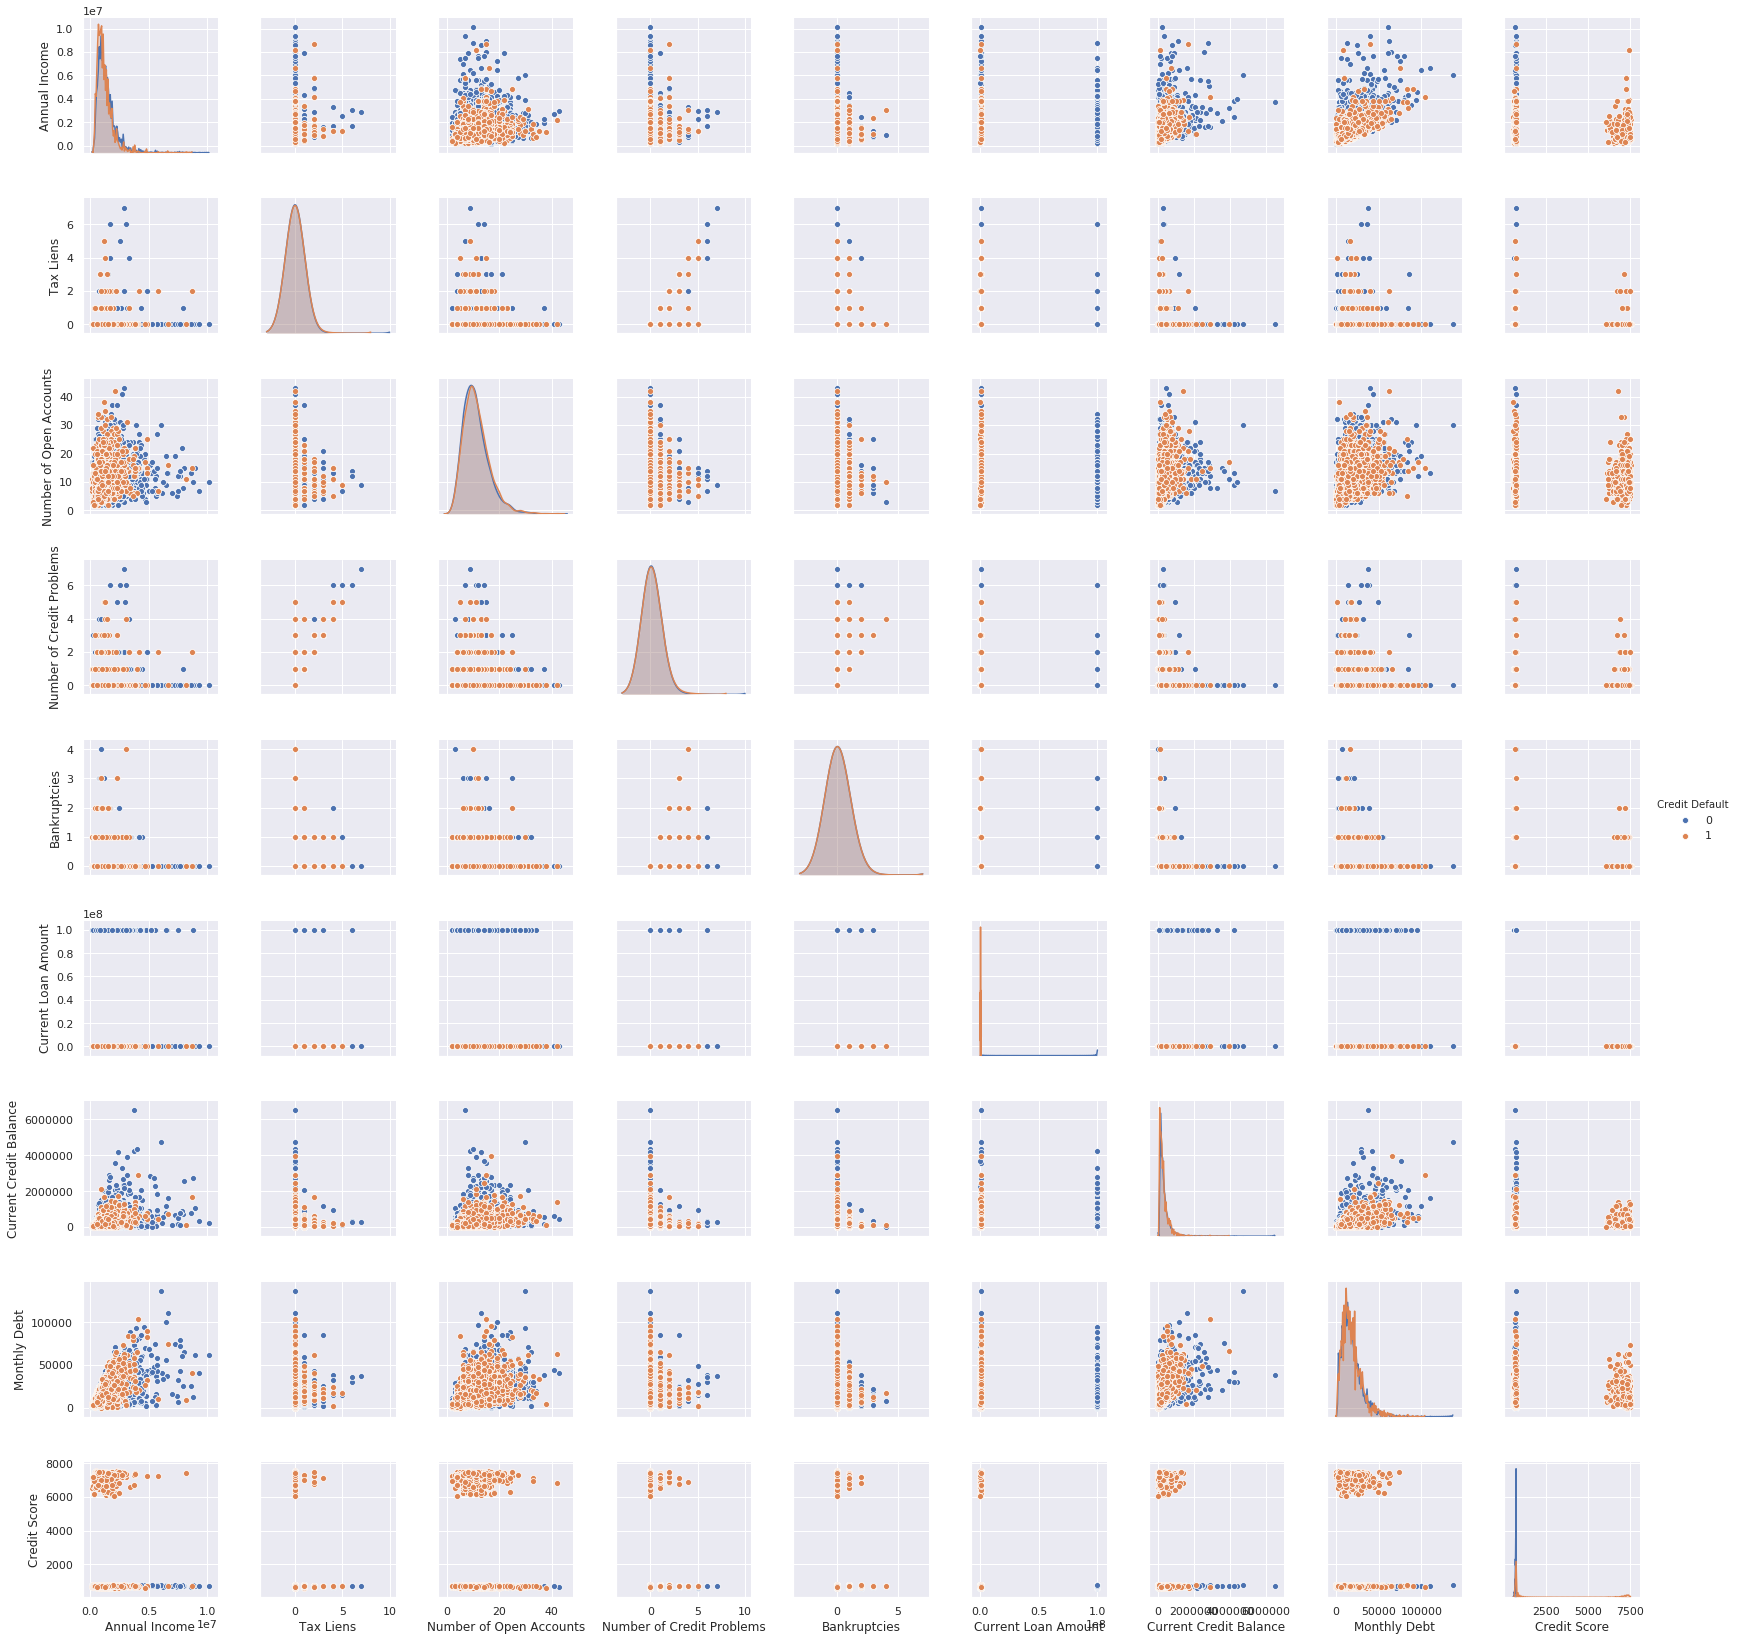

In [13]:
cols_to_exclude = ["Id", "Years of Credit History", "Maximum Open Credit", "Months since last delinquent"]
var_subset = df.drop(cols_to_exclude, axis=1)
sns.pairplot(var_subset, hue="Credit Default", diag_kws={"bw": 1})
plt.show()

### Observations



In [14]:
df["Current Loan Amount"].value_counts()

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

# To-do
* Deal with missing values
    * Income - probably median
    * Months since last delinquency - might be able to assume these are people without previous delinquencies, which means we may be able to put in a very high value (e.g. 999) and create a related dummy variable
* Extract number from years in current job
* 'Leaky' variables
    * drop credit score
* Make dummy variables out of categorical vairables
    * 'purpose' seems like a free text field - may make a dummy variable for is/isn't debt consolidation
* Deal with imbalanced dataset